In [1]:
from pathlib import Path
from zipfile import ZipFile

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px

%matplotlib inline

# Titanic: Machine Learning from Disaster

Ahoy, welcome to Kaggle! You’re in the right place.

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Read on or watch the video below to explore more details. Once you’re ready to start competing, click on the "Join Competition button to create an account and gain access to the competition data. Then check out Alexis Cook’s Titanic Tutorial that walks you through step by step how to make your first submission!

The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

Recommended Tutorial
We highly recommend [Alexis Cook’s Titanic Tutorial](https://www.kaggle.com/alexisbcook/titanic-tutorial) that walks you through making your very first submission step by step. 

## Data Import

The data has been split into two groups:

    training set (train.csv)
    test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include `gender_submission.csv`, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

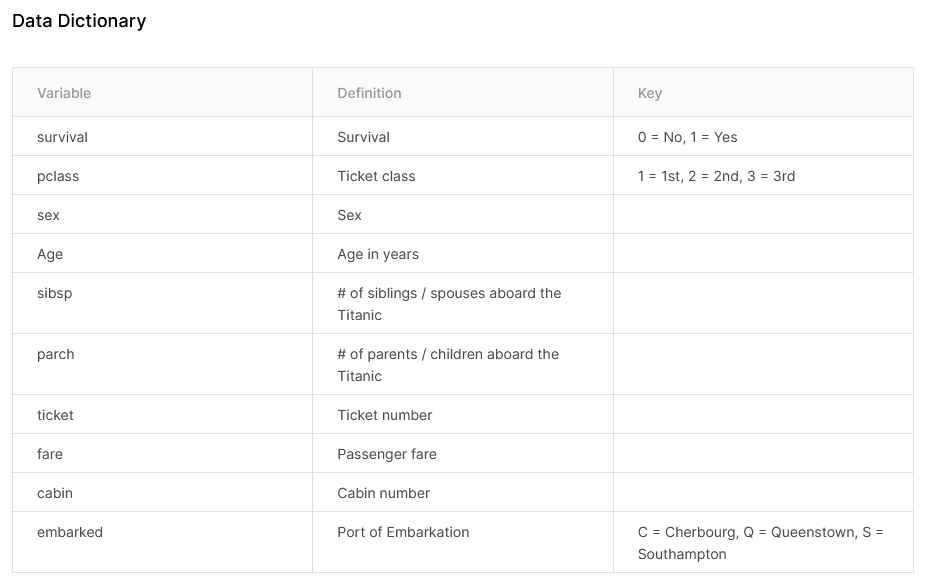

### Variable Notes

`pclass`: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

`age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`sibsp`: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

`parch`: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
zip_file = "data/titanic.zip"

zip = ZipFile(zip_file)

zip.extractall(path="data")

In [3]:
files = {l.stem: l for l in list(Path("data").glob("*.csv"))}

files

{'gender_submission': PosixPath('data/gender_submission.csv'),
 'test': PosixPath('data/test.csv'),
 'train': PosixPath('data/train.csv')}

In [4]:
df_train = pd.read_csv(files["train"]) # we dont have special columns like dates so we can just use read_csv as it is

df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
df_train.shape

(891, 12)

In [6]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
profile = ProfileReport(df_train, title="Titanic Training Set")

In [9]:
profile.to_notebook_iframe()

Pandas profiling directly tells us that the data contains 891 obsercations in total (number of rows), 866 missing values, which is 8.1% of the data, and 0 duplicate rows. Out of the 12 features (variables), 6 are categorical, 5 are numerical and one is boolean.

The Warning tab informs us that the missing values are only in Age and Cabin, with Cabin having by far the most number of missing values (77.1%), check also the missing values tab! 

## Provide the training, validation and test data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
?train_test_split

Signature: train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the
 

In [132]:
# For sklearn, X and y have to be numpy arrays and not pandas dataframes. But we want to do some more preprocessing with the data, so we will only use the data frame index
# to calculate the indices that will be the training, test and validation set
X, y = df_train.index.values, df_train["Survived"].values

In [133]:
# we use stratify to make sure that the unbalanced ratio between survivors and non survivors is kept in the different sets
# -> this makes for a bad baseline? So I decided to take stratify back to None so that we do not assume the same frequency in all sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42, shuffle=True, stratify=None)

In [134]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.33, random_state=42, shuffle=True, stratify=None)

In [135]:
X_train.shape, X_val.shape, X_test.shape

((399,), (197,), (295,))

In [136]:
assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == df_train.shape[0]

In [137]:
X_train # only the indices of the df_train data frame that will be the training data -> pay attention that X_train is no longer sorted

array([ 85,  62, 307, 509, 859, 252,  45, 322, 574, 415, 566, 642, 567,
       568,  75, 705, 145,   1, 603, 598, 756, 664, 147, 414, 397, 717,
       846, 552, 665, 351, 240, 353, 389, 637, 272, 505, 517, 190, 589,
       815, 680, 243, 117, 528, 226, 471, 460, 274, 569, 506, 549, 516,
       119, 635, 176, 418, 142, 224,  24, 547, 366, 638, 684, 805, 349,
       282, 775, 776, 593, 809, 724, 788, 608, 328, 746, 194, 441, 624,
        41, 444, 661, 520,  73, 452, 824, 162, 575, 429, 754, 157, 223,
       707,  18, 289, 602, 413, 318, 337, 463, 261, 701, 308, 201, 501,
       699, 116, 722, 873, 576,  88, 219, 150, 128, 262, 551, 489, 336,
       161, 769, 249, 732, 376, 138, 687, 524, 609, 267, 358, 234, 632,
       352, 487, 301, 675, 233, 678, 393, 156, 143, 807, 492, 888, 711,
        16, 565, 454, 666, 504, 103, 107,  32, 825,  20,  91, 188, 803,
       759, 667, 564, 601, 702, 644, 631, 764, 330, 710, 303, 437, 503,
       674, 221, 268, 263, 253, 255, 878, 627, 474, 738, 427, 85

In [138]:
from itertools import combinations

for x,y in combinations([X_train, X_val, X_test], 2):
    assert np.empty(np.intersect1d(x,y))

In [152]:
df_train = df_train.assign(
    train = df_train.index.isin(X_train).astype(int),
    val = df_train.index.isin(X_val).astype(int),
    test = df_train.index.isin(X_test).astype(int)
)

df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  training  train  val  \
0        0         A/5 21171   7.2500   NaN        S      True      1    0   
1        0          PC 17599  71.2833   C85        C     False      1    0   
2        0  STON/O2. 3101282   7.9250   NaN        S     False      0    0   
3        0            113803  53.1000  C123        S      True      1    0   
4        0            373450   8.0500   NaN        S     False      0    1   
..     ...               ...      ...   ...      ...       ...    ...  ...   
886      0            211536  13.0000   NaN        S     False      0    0   
887      0            112053  30.0000   B42        S      True      1    0   
888      2        W./C. 6607  23.4500   NaN        S     False      1    0   
889      0            111369  30.0000  C148        C      True      0    0   
890      0            370376   7.7500   NaN        Q     False      0    1   

     test  
0       0  
1       0  
2       1  
3       0  
4       0  
..    ...  
886     1  
887     0  
888     0  
889     1  
890     0  

[891 rows x 16 columns]

In [153]:
df_train.to_csv("data/train_val_test.csv", index=False) # now you can load the data with pd.read_csv() and start your work!

### Baseline

Every model has to be compared to a meaningful baseline. As we are interested in the surviving rate, it is plausible to take the majority label as a baseline. If the data were balanced, this would be roughly 50%. However, the data is not balanced, and the surviving rate is not 50%. 

In [142]:
p_surviving = np.round(df_train["Survived"].sum() / df_train["Survived"].count(), 2) * 100 # percent of survivors

p_surviving

38.0

This means that, without considering any other information, roughly 38% of the passengers in the training data survived and 62% died. A very simple model to predict the surviving rate of a new and unknown passenger would thus predict that the person died, as this is the most probable label.

In [143]:
from sklearn.dummy import DummyClassifier

In [144]:
?DummyClassifier

Init signature: DummyClassifier(*, strategy='warn', random_state=None, constant=None)
Docstring:     
DummyClassifier is a classifier that makes predictions using simple rules.

This classifier is useful as a simple baseline to compare with other
(real) classifiers. Do not use it for real problems.

Read more in the :ref:`User Guide <dummy_estimators>`.

.. versionadded:: 0.13

Parameters
----------
strategy : str, default="stratified"
    Strategy to use to generate predictions.

    * "stratified": generates predictions by respecting the training
      set's class distribution.
    * "most_frequent": always predicts the most frequent label in the
      training set.
    * "prior": always predicts the class that maximizes the class prior
      (like "most_frequent") and ``predict_proba`` returns the class prior.
    * "uniform": generates predictions uniformly at random.
    * "constant": always predicts a constant label that is provided by
      the user. This is useful for metrics t

In [150]:
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train) # no data needed because dummy does not learn anything, it only looks at y!
y_pred = dummy.predict(X_val) # should contain only zeros

dummy.score(None, y_val) 
# so that is our baseline which is roughly the 62% from above, because we divided the data with the help of train_test_split and stratify=None so that the frequency of the labels is not preserved

0.6040609137055838

## Final Submission Approach

From here, everyone can start to implement their own approaches. You can preprocess, change, transform the data in df_train as you like and you can try whichever model you want. The idea is that `df_train[df_train.train == 1]` is your training data, `df_train[df_train.val == 1]` is validation data that you use for model selection as well as hyperparameter tuning. If you are satisfied, you calculate your final model performance on the test set, `df_train[df_train.test == 1]`.